In [1]:
#load the dataset
import gzip

def load_txt_gz(file_path):
    with gzip.open(file_path, 'rt', errors='ignore') as file:
        content = [line.strip() for line in file]
    return content

#file_path = 'C:/Users/nicco/OneDrive - ETH Zurich/Master EST/23FS - DTU/Computational Social Science/Ass3_4/quotes_2008-08.txt.gz'
content = load_txt_gz('quotes_2008-08.txt.gz')

# Print the first few lines to inspect the content
for line in content[:10]:
    print(line)

P	http://codeproject.com/kb/silverlight/convertsilverlightcontrol.aspx
T	2008-08-01 00:00:00
Q	how to create property binding in a visual webgui silverlight control
Q	videoplayer silverlight controls videoplayer videoplayer silverlight controls version 1 0 0 0 culture neutral publickeytoken null
Q	videoplayer controls videoplayer videoplayer controls

P	http://wallstreetexaminer.com/?p=2987
T	2008-08-01 00:00:01

P	http://news.bbc.co.uk/go/rss/-/1/hi/scotland/highlands_and_islands/7535558.stm


In [2]:
#Check RAM usage
import os
import psutil

def print_used_ram():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    used_ram = mem_info.rss / (1024 * 1024)  # Convert to MB
    print(f"Used RAM: {used_ram:.2f} MB")

print_used_ram()

Used RAM: 7917.80 MB


In [ ]:
sub = []
for line in content[:100000000]:
    sub.append(line)

In [4]:
import gzip
filename ="subset.txt.gz"

with gzip.open(filename, 'wt') as fo:
    for line in content[:100]:
        fo.write(line)

In [5]:
# Print the first few lines to inspect the content
for line in content[:20]:
    print(line)

P	http://codeproject.com/kb/silverlight/convertsilverlightcontrol.aspx
T	2008-08-01 00:00:00
Q	how to create property binding in a visual webgui silverlight control
Q	videoplayer silverlight controls videoplayer videoplayer silverlight controls version 1 0 0 0 culture neutral publickeytoken null
Q	videoplayer controls videoplayer videoplayer controls

P	http://wallstreetexaminer.com/?p=2987
T	2008-08-01 00:00:01

P	http://news.bbc.co.uk/go/rss/-/1/hi/scotland/highlands_and_islands/7535558.stm
T	2008-08-01 00:00:01
Q	our continuing strategic priority is to provide a safe and efficient group of airports while pursuing development opportunities which improve the air transport network serving the region
Q	our results for the year demonstrate that we have delivered against these targets and ensured that our airports have continued to play a central role in the economic and social life of the highlands and islands and tayside

P	http://news.bbc.co.uk/go/rss/-/1/hi/scotland/south_of_scotland/

In [6]:
import networkx as nx

# Initialize an empty graph
G = nx.DiGraph()

current_node = None

for line in content:
    parts = line.split("\t")
    
    if parts[0] == "P":
        current_node = parts[1].strip()
        G.add_node(current_node, name=current_node, attributes=[], links=[])
    elif current_node is not None:
        if parts[0] == "T":
            G.nodes[current_node]["timestamp"] = parts[1].strip()
        elif parts[0] == "Q":
            G.nodes[current_node]["attributes"].append(parts[1].strip())
        elif parts[0] == "L":
            link = parts[1].strip()
            if not G.has_node(link):
                G.add_node(link, name=link, attributes=[], links=[])
            G.add_edge(current_node, link)

# Now G contains the network created from the list

In [21]:
# Calculate summary statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)

# Print summary statistics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Density: {density:.4f}")

# Calculate and print some additional statistics if the graph is not empty
if num_nodes > 0:
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    max_in_degree_node = max(in_degrees, key=in_degrees.get)
    max_out_degree_node = max(out_degrees, key=out_degrees.get)
    
    print(f"Node with maximum in-degree: {max_in_degree_node} (in-degree: {in_degrees[max_in_degree_node]})")
    print(f"Node with maximum out-degree: {max_out_degree_node} (out-degree: {out_degrees[max_out_degree_node]})")

    # Calculate connected components for a weakly connected version of the graph
    G_weak = nx.DiGraph.to_undirected(G)
    connected_components = [c for c in nx.connected_components(G_weak)]
    num_connected_components = len(connected_components)
    largest_connected_component = max(connected_components, key=len)
    
    print(f"Number of connected components: {num_connected_components}")
    print(f"Size of the largest connected component: {len(largest_connected_component)}")

Number of nodes: 2729743
Number of edges: 3336256
Average degree: 2.44
Density: 0.0000
Node with maximum in-degree: http://vimeo.com/log_in (in-degree: 4733)
Node with maximum out-degree: http://citeulike.org/group/5855/article/2913153 (out-degree: 3600)
Number of connected components: 882724
Size of the largest connected component: 1221125


In [6]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

C:\Users\nicco\AppData\Local\Temp\ipykernel_17980\4258825456.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), np.round(math.ceil(max(X))/100).astype(np.int)) #create bins with width of two
C:\Users\nicco\AppData\Local\Temp\ipykernel_17980\4258825456.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` 

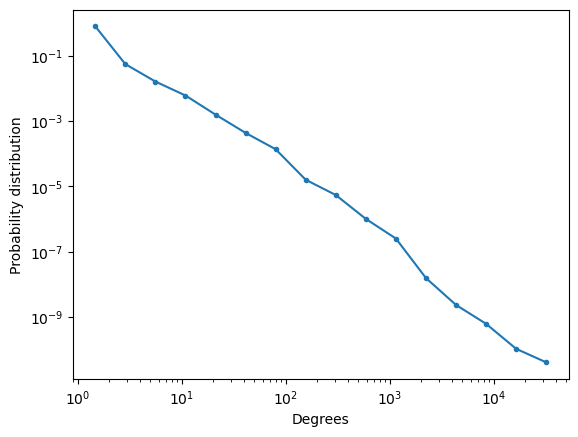

In [13]:
X = degrees = [d for n, d in G.degree()]
x_log = True
y_log = True
bar_hist = False


# Create histogram
bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), np.round(math.ceil(max(X))/100).astype(np.int)) #create bins with width of two
if x_log:
    bins = np.logspace(0, np.log10(math.ceil(max(X))), np.round(math.ceil(max(X))/2500).astype(np.int))
hist, edges = np.histogram(X, bins = bins, density = True) #change density to false if you want y = count (instead of probability distribution))
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j>0]) #only keep values above zero

fig, ax = plt.subplots()
if bar_hist:
    ax.bar(xx, yy, width = width *0.9)
else:
    ax.plot(xx, yy, marker = '.')

ax.set_xlabel('Degrees')
ax.set_ylabel('Probability distribution')
if x_log:
    ax.set_xscale('log')
if y_log:
    ax.set_yscale('log')